In [1]:
# EXP_NAME="ViTDCNv3HeavyDetach_tuner_config_ML_1M"
# EXP_NAME="ViTDCNv3HeavyDim_tuner_config_iPinYou"
# EXP_NAME="ViTDCNv3HeavyDim_tuner_config_iPinYou"
# EXP_NAME="PGAResNet_tuner_config_iPinYou"
EXP_NAME="LogCNv3_exp_bias_mask_config_iPinYou"

In [2]:
import yaml
with open(f'config/{EXP_NAME}/model_config.yaml', 'r') as file:
    model_configs = yaml.safe_load(file)
model_configs

{'LogCNv3_iPinYou_x1_001_d4ce82c5': {'batch_norm': True,
  'batch_size': 4096,
  'dataset_id': 'iPinYou_x1_csv_c2b11acf',
  'debug_mode': False,
  'early_stop_patience': 2,
  'embedding_dim': 16,
  'embedding_regularizer': 0.001,
  'epochs': 100,
  'eval_steps': None,
  'exp_additional_mask': True,
  'exp_bias_on_final': True,
  'feature_config': None,
  'feature_specs': None,
  'group_id': None,
  'layer_norm': True,
  'learning_rate': 0.001,
  'loss': 'binary_crossentropy',
  'metrics': ['logloss', 'AUC'],
  'model': 'LogCNv3',
  'model_root': './checkpoints/',
  'monitor': {'AUC': 1, 'logloss': 0},
  'monitor_mode': 'max',
  'net_dropout': 0,
  'net_regularizer': 0,
  'num_heads': 1,
  'num_mask_blocks': 2,
  'num_mask_heads': 2,
  'num_workers': 16,
  'optimizer': 'adam',
  'output_log': False,
  'pickle_feature_encoder': True,
  'save_best_only': True,
  'seed': 2024,
  'shuffle': True,
  'task': 'binary_classification',
  'use_features': None,
  'verbose': 1},
 'LogCNv3_iPinYou_x

In [3]:
import csv
import re
import numpy as np
import matplotlib.pyplot as plt
import yaml

results = []
with open(f"{EXP_NAME}.csv", 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        config_key = row[2].split()[1]
        test_column = row[6]
        match = re.search(r'logloss: ([0-9.]+) - AUC: ([0-9.]+)', test_column)
        if match:
            logloss = float(match.group(1))
            auc = float(match.group(2))
            # if(auc < 0.6):
            #     continue
            result = {'logloss': logloss, 'AUC': auc}
            try:
                # if(len(backup_df)):
                #     if(len(backup_df[(backup_df["logloss"] == logloss) & (backup_df["AUC"] == auc)])):
                #         continue
                result.update(model_configs[config_key])
                results.append(result)
            except Exception as e:
                print(e)
                pass

In [4]:
results

[{'logloss': 16.106273,
  'AUC': 0.5,
  'batch_norm': True,
  'batch_size': 4096,
  'dataset_id': 'iPinYou_x1_csv_c2b11acf',
  'debug_mode': False,
  'early_stop_patience': 2,
  'embedding_dim': 16,
  'embedding_regularizer': 0.001,
  'epochs': 100,
  'eval_steps': None,
  'exp_additional_mask': False,
  'exp_bias_on_final': False,
  'feature_config': None,
  'feature_specs': None,
  'group_id': None,
  'layer_norm': True,
  'learning_rate': 0.001,
  'loss': 'binary_crossentropy',
  'metrics': ['logloss', 'AUC'],
  'model': 'LogCNv3',
  'model_root': './checkpoints/',
  'monitor': {'AUC': 1, 'logloss': 0},
  'monitor_mode': 'max',
  'net_dropout': 0,
  'net_regularizer': 0,
  'num_heads': 1,
  'num_mask_blocks': 2,
  'num_mask_heads': 2,
  'num_workers': 16,
  'optimizer': 'adam',
  'output_log': False,
  'pickle_feature_encoder': True,
  'save_best_only': True,
  'seed': 2024,
  'shuffle': True,
  'task': 'binary_classification',
  'use_features': None,
  'verbose': 1},
 {'logloss': 0

In [5]:
import pandas as pd

df = pd.DataFrame(results)
df

,logloss,AUC,batch_norm,batch_size,dataset_id,debug_mode,early_stop_patience,embedding_dim,embedding_regularizer,epochs,...,num_workers,optimizer,output_log,pickle_feature_encoder,save_best_only,seed,shuffle,task,use_features,verbose
0,16.106273,0.500000,True,4096,iPinYou_x1_csv_c2b11acf,False,2,16,0.001,100,...,16,adam,False,True,True,2024,True,binary_classification,None,1
1,0.005579,0.780199,True,4096,iPinYou_x1_csv_c2b11acf,False,2,16,0.001,100,...,16,adam,False,True,True,2024,True,binary_classification,None,1
2,0.005564,0.781563,True,4096,iPinYou_x1_csv_c2b11acf,False,2,16,0.001,100,...,16,adam,False,True,True,2024,True,binary_classification,None,1
3,0.005556,0.781919,True,4096,iPinYou_x1_csv_c2b11acf,False,2,16,0.001,100,...,16,adam,False,True,True,2024,True,binary_classification,None,1


In [6]:
df[df.select_dtypes(include=['object']).columns] = df.select_dtypes(include=['object']).astype('string')

In [7]:
df.dropna()

,logloss,AUC,batch_norm,batch_size,dataset_id,debug_mode,early_stop_patience,embedding_dim,embedding_regularizer,epochs,...,num_workers,optimizer,output_log,pickle_feature_encoder,save_best_only,seed,shuffle,task,use_features,verbose


In [8]:
# assert False
# if(False):
#   df.to_pickle(f"{EXP_NAME}_backup.pkl")

In [9]:
metrics = ["logloss", "AUC"]
hyperparam_lst = set(df.columns) - set(metrics)
more_than_two_cols = [param for param in list(hyperparam_lst) if len(df[param].unique()) > 1 ]
more_than_two_cols

['exp_bias_on_final', 'exp_additional_mask']

In [10]:
# df = df[df["AUC"] > 0.6]

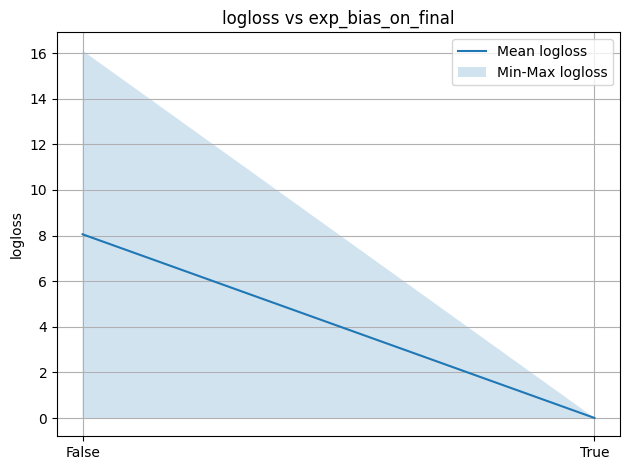

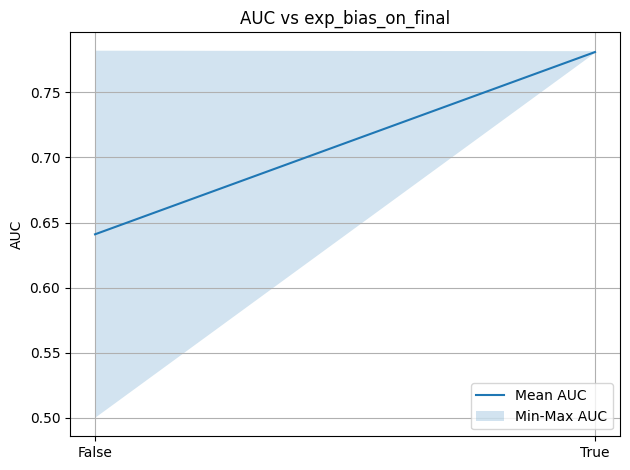

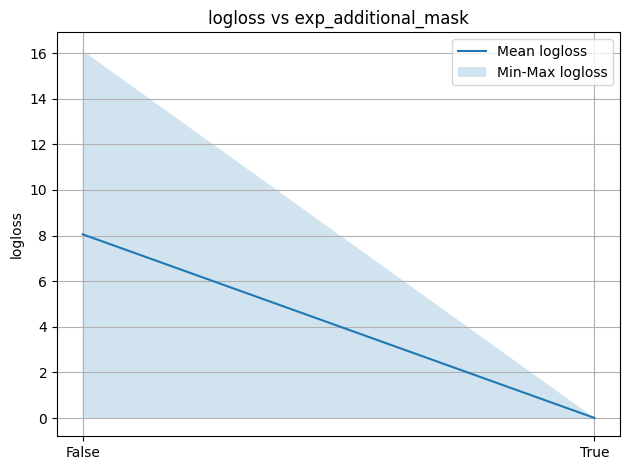

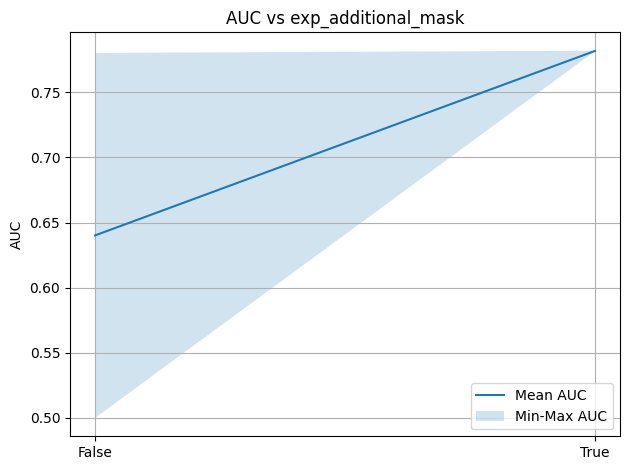

In [11]:
for param in more_than_two_cols:
    unique_values = df[param].unique()
    logloss_lst, auc_lst = [], []

    try:
        unique_values = sorted(unique_values)
    except:
        pass
    for value in unique_values:
        logloss_result = df[df[param] == value]["logloss"]
        auc_result = df[df[param] == value]["AUC"]

        logloss_lst.append([logloss_result.min(), logloss_result.mean(), logloss_result.max()])
        auc_lst.append([auc_result.min(), auc_result.mean(), auc_result.max()])
    logloss_lst = np.array(logloss_lst)
    auc_lst = np.array(auc_lst)
    metric_dict = {
        "logloss": logloss_lst,
        "AUC": auc_lst
    }
    # for metric in metrics:
    #     print(np.arange(len(metric_dict[metric])))
    #     print(metric_dict[metric][:, 1])
    for metric in metrics:
        plt.figure()
        plt.plot(np.arange(len(metric_dict[metric])), metric_dict[metric][:, 1], label=f'Mean {metric}')
        plt.fill_between(np.arange(len(metric_dict[metric])), metric_dict[metric][:, 0], metric_dict[metric][:, 2], alpha=0.2, label=f'Min-Max {metric}')
        plt.xticks(np.arange(len(metric_dict[metric])), unique_values)
        plt.ylabel(metric)
        plt.title(f'{metric} vs {param}')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

In [12]:
results

[{'logloss': 16.106273,
  'AUC': 0.5,
  'batch_norm': True,
  'batch_size': 4096,
  'dataset_id': 'iPinYou_x1_csv_c2b11acf',
  'debug_mode': False,
  'early_stop_patience': 2,
  'embedding_dim': 16,
  'embedding_regularizer': 0.001,
  'epochs': 100,
  'eval_steps': None,
  'exp_additional_mask': False,
  'exp_bias_on_final': False,
  'feature_config': None,
  'feature_specs': None,
  'group_id': None,
  'layer_norm': True,
  'learning_rate': 0.001,
  'loss': 'binary_crossentropy',
  'metrics': ['logloss', 'AUC'],
  'model': 'LogCNv3',
  'model_root': './checkpoints/',
  'monitor': {'AUC': 1, 'logloss': 0},
  'monitor_mode': 'max',
  'net_dropout': 0,
  'net_regularizer': 0,
  'num_heads': 1,
  'num_mask_blocks': 2,
  'num_mask_heads': 2,
  'num_workers': 16,
  'optimizer': 'adam',
  'output_log': False,
  'pickle_feature_encoder': True,
  'save_best_only': True,
  'seed': 2024,
  'shuffle': True,
  'task': 'binary_classification',
  'use_features': None,
  'verbose': 1},
 {'logloss': 0

In [13]:
# df[df["resnet_initialize"]]["logloss"].mean(), df[df["resnet_freeze"]]["logloss"].mean()

In [14]:
df.sort_values("logloss")[metrics+more_than_two_cols].iloc[:10]

,logloss,AUC,exp_bias_on_final,exp_additional_mask
3,0.005556,0.781919,False,True
2,0.005564,0.781563,True,True
1,0.005579,0.780199,True,False
0,16.106273,0.500000,False,False


In [15]:
df.sort_values("AUC", ascending=False)[metrics+more_than_two_cols].iloc[:10]

,logloss,AUC,exp_bias_on_final,exp_additional_mask
3,0.005556,0.781919,False,True
2,0.005564,0.781563,True,True
1,0.005579,0.780199,True,False
0,16.106273,0.500000,False,False


In [16]:
# df.to_pickle(f"{EXP_NAME}_final.pkl")

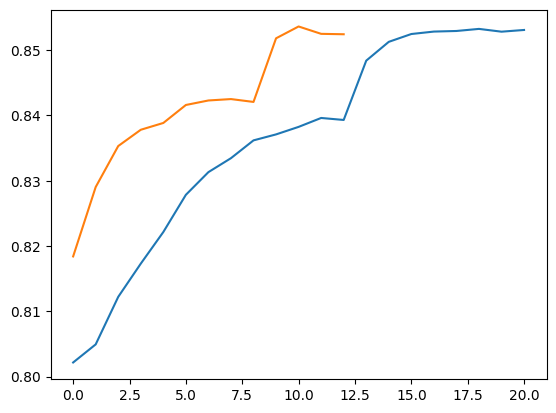

In [17]:
import matplotlib.pyplot as plt
import numpy as np

vits = [
    0.802154, 0.804925, 0.812207, 0.817295, 0.822139, 0.827837, 0.831312, 0.833450, 0.836177, 0.837092, 0.838243, 0.839610, 0.839304, 0.848389, 0.851271, 0.852469, 0.852843, 0.852934, 0.853253, 0.852827, 0.853089
]

dcnv2 = [
    0.818400, 0.829029, 0.835310, 0.837802, 0.838844, 0.841598, 0.842289, 0.842503, 0.842066, 0.851811, 0.853624, 0.852496, 0.852433
]

plt.plot(np.arange(len(vits)), vits)
plt.plot(np.arange(len(dcnv2)), dcnv2)

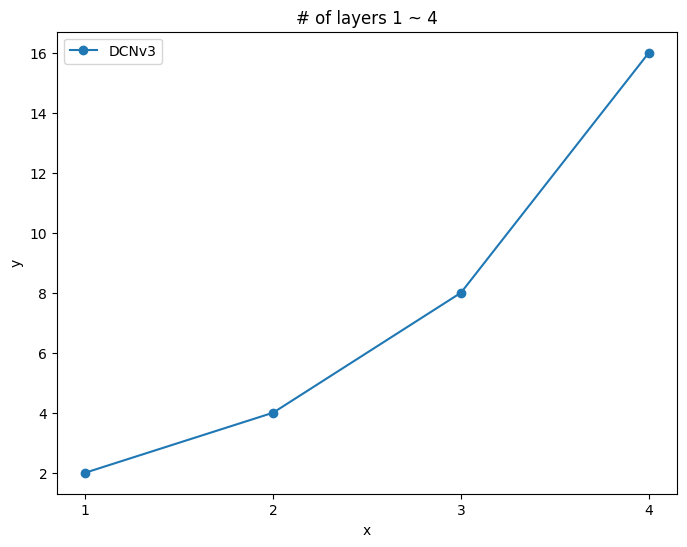

In [18]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(4)+1
input_dim = 256
max_feat_inter = np.power(input_dim, x)  # x에 대한 input_dim의 거듭제곱 계산

plt.figure(figsize=(8, 6))

# exp2(x) 그래프
plt.plot(x, np.exp2(x), label='DCNv3', marker='o')

# input_dim에 대한 max_feat_inter 그래프
# plt.plot(x, max_feat_inter, label=f'LogFC', marker='o')

# 제목, 축 라벨, 범례 추가
plt.title('# of layers 1 ~ 4')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.xticks(x)

# 그래프 표시
plt.show()


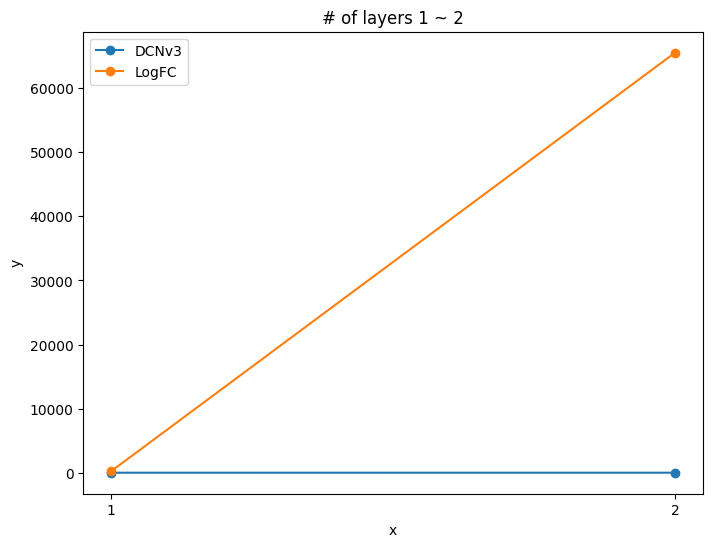

In [19]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(2)+1
input_dim = 256
max_feat_inter = np.power(input_dim, x)  # x에 대한 input_dim의 거듭제곱 계산

plt.figure(figsize=(8, 6))

# exp2(x) 그래프
plt.plot(x, np.exp2(x), label='DCNv3', marker='o')

# input_dim에 대한 max_feat_inter 그래프
plt.plot(x, max_feat_inter, label=f'LogFC', marker='o')

# 제목, 축 라벨, 범례 추가
plt.title('# of layers 1 ~ 2')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.xticks(x)
# 그래프 표시
plt.show()


In [20]:
np.pow(2, 3)

np.int64(8)

In [21]:
# batchnorm x
auc_lst = [0.621575, 0.678372, 0.734146, 0.758378, 0.760357, 0.763221, 0.760110, 0.766132, 0.768676, 0.770026, 0.772620, 0.774499, 0.775069, 0.775483, 0.775738, 0.776423, 0.775596, 0.775662]
len(auc_lst), max(auc_lst)

(18, 0.776423)

In [22]:
# batchnorm1d, 1
auc_lst = [0.662880, 0.745848, 0.763363, 0.764978, 0.759760, 0.774287, 0.777002, 0.779828, 0.781120, 0.780510, 0.782375, 0.782507, 0.782368]
len(auc_lst), max(auc_lst)

(13, 0.782507)